## Import the required libraries

In [188]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Data Exploration

In [189]:
income_data = pd.read_csv("Data/income_data.csv") #store the dataset in Dataframe 'income_data'
data = income_data.copy() #take a backup of Dataframe
print(data) #display the data

     Unnamed: 0    income  happiness
0             1  3.862647   2.314489
1             2  4.979381   3.433490
2             3  4.923957   4.599373
3             4  3.214372   2.791114
4             5  7.196409   5.596398
..          ...       ...        ...
493         494  5.249209   4.568705
494         495  3.471799   2.535002
495         496  6.087610   4.397451
496         497  3.440847   2.070664
497         498  4.530545   3.710193

[498 rows x 3 columns]


In [190]:
data.describe()

,Unnamed: 0,income,happiness
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


In [191]:
data.corr()
print(data.corr())

            Unnamed: 0    income  happiness
Unnamed: 0    1.000000  0.024831   0.029269
income        0.024831  1.000000   0.865634
happiness     0.029269  0.865634   1.000000


# Data Vizualization

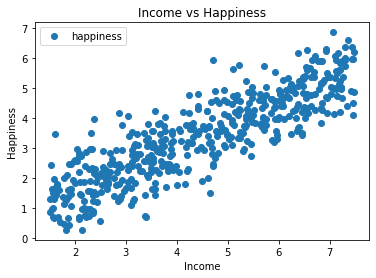

In [192]:
data.plot(x='income', y='happiness', style='o')  
plt.title('Income vs Happiness')  
plt.xlabel('Income')  
plt.ylabel('Happiness')  
plt.show()

## Data Cleaning

In [193]:
data.isnull().sum() # Check all variables are having null

Unnamed: 0    0
income        0
happiness     0
dtype: int64

In [194]:
data.drop(data.columns[[0]], axis = 1, inplace = True) #Remove based on first index
print(data.head()) #Display first five rows

     income  happiness
0  3.862647   2.314489
1  4.979381   3.433490
2  4.923957   4.599373
3  3.214372   2.791114
4  7.196409   5.596398


## Building the model

In [195]:
#Data preparation
input_value = data.iloc[:, :-1].values 
target_value = data.iloc[:, 1].values

In [196]:
#Splitting the data for test and train
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(input_value, target_value, 
                            test_size=0.2, random_state=0) 

In [197]:
#Building the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

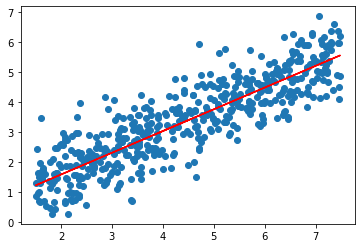

In [198]:
# Plotting the regression line
line = regressor.coef_*input_value+regressor.intercept_
# Plotting for the test data
plt.scatter(input_value, target_value)
plt.plot(input_value, line,'red')
plt.show()

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pred_cv = regressor.predict(X_test)
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred_cv)) 

Mean Absolute Error: 0.6174050608886752


## Predicting the value

In [202]:
predict_data = pd.DataFrame({'Actual': y_test, 'Predicted': pred_cv})  
print(predict_data )

      Actual  Predicted
0   1.775933   3.033184
1   1.877147   2.045445
2   2.465761   1.530116
3   1.560355   2.281021
4   0.898733   1.840929
..       ...        ...
95  3.615471   3.718798
96  4.802092   4.503831
97  4.328417   4.414682
98  5.498147   5.176406
99  1.095999   2.381832

[100 rows x 2 columns]


In [201]:
income_input = [[1.775933]]
happiness_pred = regressor.predict(income_input)
print("Income :",income)
print("Happiness :",happiness_pred)

Income : [[1.775933]]
Happiness : [1.41746106]
